In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.names'

location_names = {}
count = 0
with open(aruba_dataset_path, 'r') as content_file:
    content = content_file.read()
    content = str.splitlines(content)
for count,location in enumerate(content):
    location_names[count] = location
print(location_names)


aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.min'

dataset = pd.read_csv(aruba_dataset_path, names=['location', 'time'])
dataset['time'] = dataset.index
dataset['time'] = pd.to_timedelta(dataset['time'], unit='m')
dataset['minute'] = (dataset['time']/ np.timedelta64(1, 'm')).astype(int)


#Renaming location number with their names
for key,value in location_names.items():
    dataset.ix[dataset.location ==key, 'location_name'] = value
    
def mod_for_minute(row):
    return row['minute'] % 1440
dataset['sep_minute'] = dataset.apply(mod_for_minute, axis=1)

{0: 'Master bedroom', 1: 'Master bathroom', 2: 'Living room', 3: 'Kitchen', 4: 'Center', 5: 'Corridor', 6: 'Second bedroom', 7: 'Office', 8: 'Second bathroom', 9: 'Outside'}


In [19]:
dataset.head()

,location,time,minute,location_name,sep_minute
0,0,00:00:00,0,Master bedroom,0
1,0,00:01:00,1,Master bedroom,1
2,0,00:02:00,2,Master bedroom,2
3,0,00:03:00,3,Master bedroom,3
4,0,00:04:00,4,Master bedroom,4


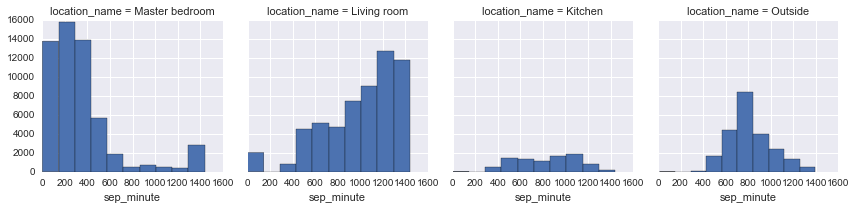

In [24]:
%matplotlib inline

in_location_subset = dataset['location'].isin([0,2,3,9])
g = sns.FacetGrid(dataset[in_location_subset], col="location_name")
g.map(plt.hist, "sep_minute");
